In [10]:
import pandas as pd
from glob import glob as lsfiles
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl


from matplotlib import font_manager as fm, rcParams
#fpath_reg = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-Regular.ttf")
prop_reg = fm.FontProperties(fname=fpath_reg)
#fpath_light = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-light.ttf")
prop_light = fm.FontProperties(fname=fpath_light)

pd.options.mode.chained_assignment = None  # default='warn'



# Step 1 

convert your dataframe so that it has the columns (with the column names): 


|group|values|

each group refers to the rows (each distribution) and the values are the quantities of the distribution

In this case, the groups would be the teams (MOBS/ Ensemble/ JHU... etc.) and the values would be the WIS scores

In [2]:
#this will break for you, so load your code and change the column names here

data = pd.read_csv("../../data/data.csv")
data = data[['label','mean','detection probability']].drop_duplicates().rename(columns= {"mean":"values","detection probability":"group"})
data = data.merge(gleam[['country_iso3','continent_label']].drop_duplicates(), left_on = "label",right_on = "country_iso3")



data.head()


,label,values,group,country_iso3,continent_label
0,ABW,27.255449,0.1,ABW,North America
1,ABW,18.034894,0.5,ABW,North America
2,ABW,15.173982,1.0,ABW,North America
3,AFG,76.194814,0.1,AFG,Asia
4,AFG,65.400150,0.5,AFG,Asia


In [3]:
color_category = "continent_label" #you don't need this
group2name = {0.1: "10% Detection Probability",\
             0.5: "50% Detection Probability",\
             1: "100% Detection Probability"}

In [12]:
def create_penguin_plots(data,kde_args,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """


    total_groups = data.group.unique().shape[0]
    total_min = 0 #data['values'].min()
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (12,total_groups*2.3),tight_layout = False)
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)


        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1)
        for patch in ax[i+1].artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .25,) 

        ax[i].axis("off")
        ax[i+1].axis("off")

        ax[i+1].set_xlim(xmin = total_min,xmax = total_max,)
        ax[i].set_xlim(xmin = total_min,xmax = total_max)

        ax[i+1].set_ylim(-.6,.5)
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")

        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes, horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(.03,0,group,transform=ax[i].transAxes, horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].vlines(x = t,ymin = -.5,ymax= .44,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)

    return fig, ax



0.1 51.26586346693237
0.5 40.88244049082639
1.0 36.21937548149603


/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

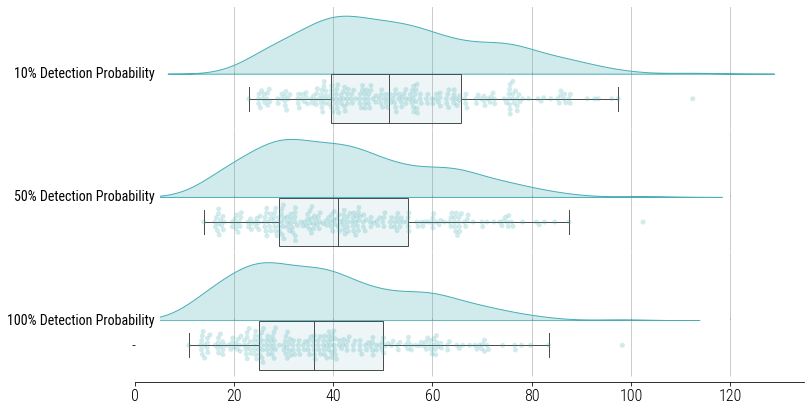

In [5]:
fig, ax_mat = create_penguin_plots(data,kde_args = {"lw":1,"bw_adjust":.9}, group2name=group2name)

0.1 51.26586346693237
0.5 40.88244049082639
1.0 36.21937548149603


/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

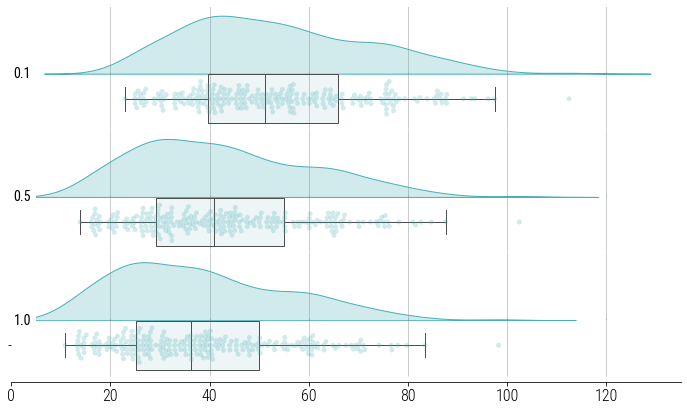

In [6]:
fig, ax_mat = create_penguin_plots(data,kde_args = {"lw":1,"bw_adjust":.9})

0.1 51.26586346693237
0.5 40.88244049082639
1.0 36.21937548149603


/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

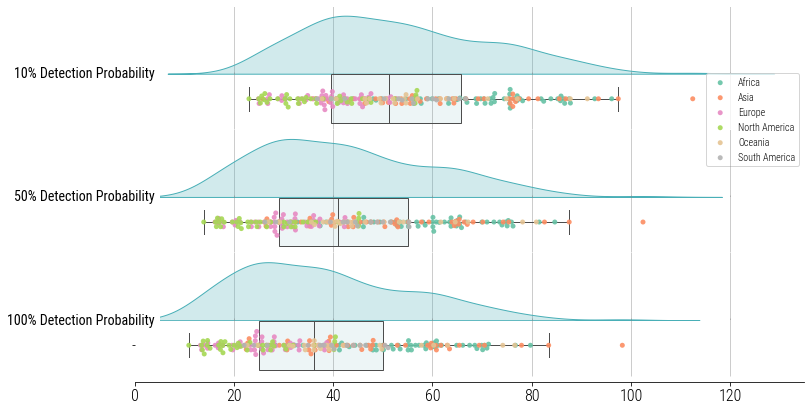

In [7]:
fig, ax_mat = create_penguin_plots(data,kde_args = {"lw":1,"bw_adjust":.9}, color_category='continent_label', \
                              group2name=group2name)


In [3]:
df_hosp_wisnorm= pd.read_pickle('df_wisnorm_hosp_414.pkl')
df_death_wisnorm = pd.read_pickle('df_wisnorm_death_414.pkl')
df_case_wisnorm = pd.read_pickle('df_wisnorm_case_414.pkl')

In [4]:
df_hosp_wisnorm = df_hosp_wisnorm.rename(columns= {"WIS":"values","Model":"group"})
df_death_wisnorm = df_death_wisnorm.rename(columns= {"WIS":"values","Model":"group"})
df_case_wisnorm = df_case_wisnorm.rename(columns= {"WIS":"values","Model":"group"})


In [5]:
wisnormalldf = pd.concat([df_case_wisnorm, df_death_wisnorm, df_hosp_wisnorm])

In [6]:
wisnormalldf = wisnormalldf[wisnormalldf.group != 'NotreDame-FRED']
wisnormalldf = wisnormalldf[wisnormalldf.group != 'UTA-ImmunoSEIRS']

In [7]:
models = list(wisnormalldf.group.unique())
allmed = []
for model in models:
    med = wisnormalldf[wisnormalldf['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

wisnormalldf.group = wisnormalldf.group.astype("category")
wisnormalldf.group = wisnormalldf.group.cat.set_categories(modelorder)
wisnormalldf.sort_values(["group"])


,group,values,50% Coverage,95% Coverage,Location,Population,Label
82,Ensemble_LOP,0.510883,0.166667,0.583333,Florida,21477737,Median aggregate
361,Ensemble_LOP,0.953744,0.916667,1.000000,South Carolina,5148714,Median aggregate
73,Ensemble_LOP,0.353024,0.833333,1.000000,District of Columbia,705749,Median aggregate
118,Ensemble_LOP,0.377396,0.000000,1.000000,Illinois,12671821,Median aggregate
217,Ensemble_LOP,0.285740,0.833333,1.000000,Mississippi,2976149,Median aggregate
...,...,...,...,...,...,...,...
195,USC-SIkJalpha,1.380919,0.166667,0.333333,Massachusetts,6892503,Median aggregate
276,USC-SIkJalpha,1.717543,0.166667,0.333333,New Jersey,8882190,Median aggregate
159,USC-SIkJalpha,0.864825,0.250000,0.416667,Kentucky,4467673,Median aggregate
168,USC-SIkJalpha,0.316083,0.500000,0.666667,Louisiana,4648794,Median aggregate


Ensemble_LOP 0.36289035067723013


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)


Ensemble 0.38377021838796804


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


JHU_IDD-CovidSP 0.4651525751428376


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Ensemble_LOP_untrimmed 0.4714449536403899


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


UNCC-hierbin 0.6785301397757394


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the mar

MOBS_NEU-GLEAM_COVID 0.6875333581069037


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the mar

UVA-adaptive 0.8495312855334279


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the mar

UVA-EpiHiper 1.3360870638408


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the mar

USC-SIkJalpha 1.920168571585938


/var/folders/tc/9lbjwrhx1dv0_0vb1_v_4q6r0000gp/T/ipykernel_50045/2437722974.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bay.c/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the mar

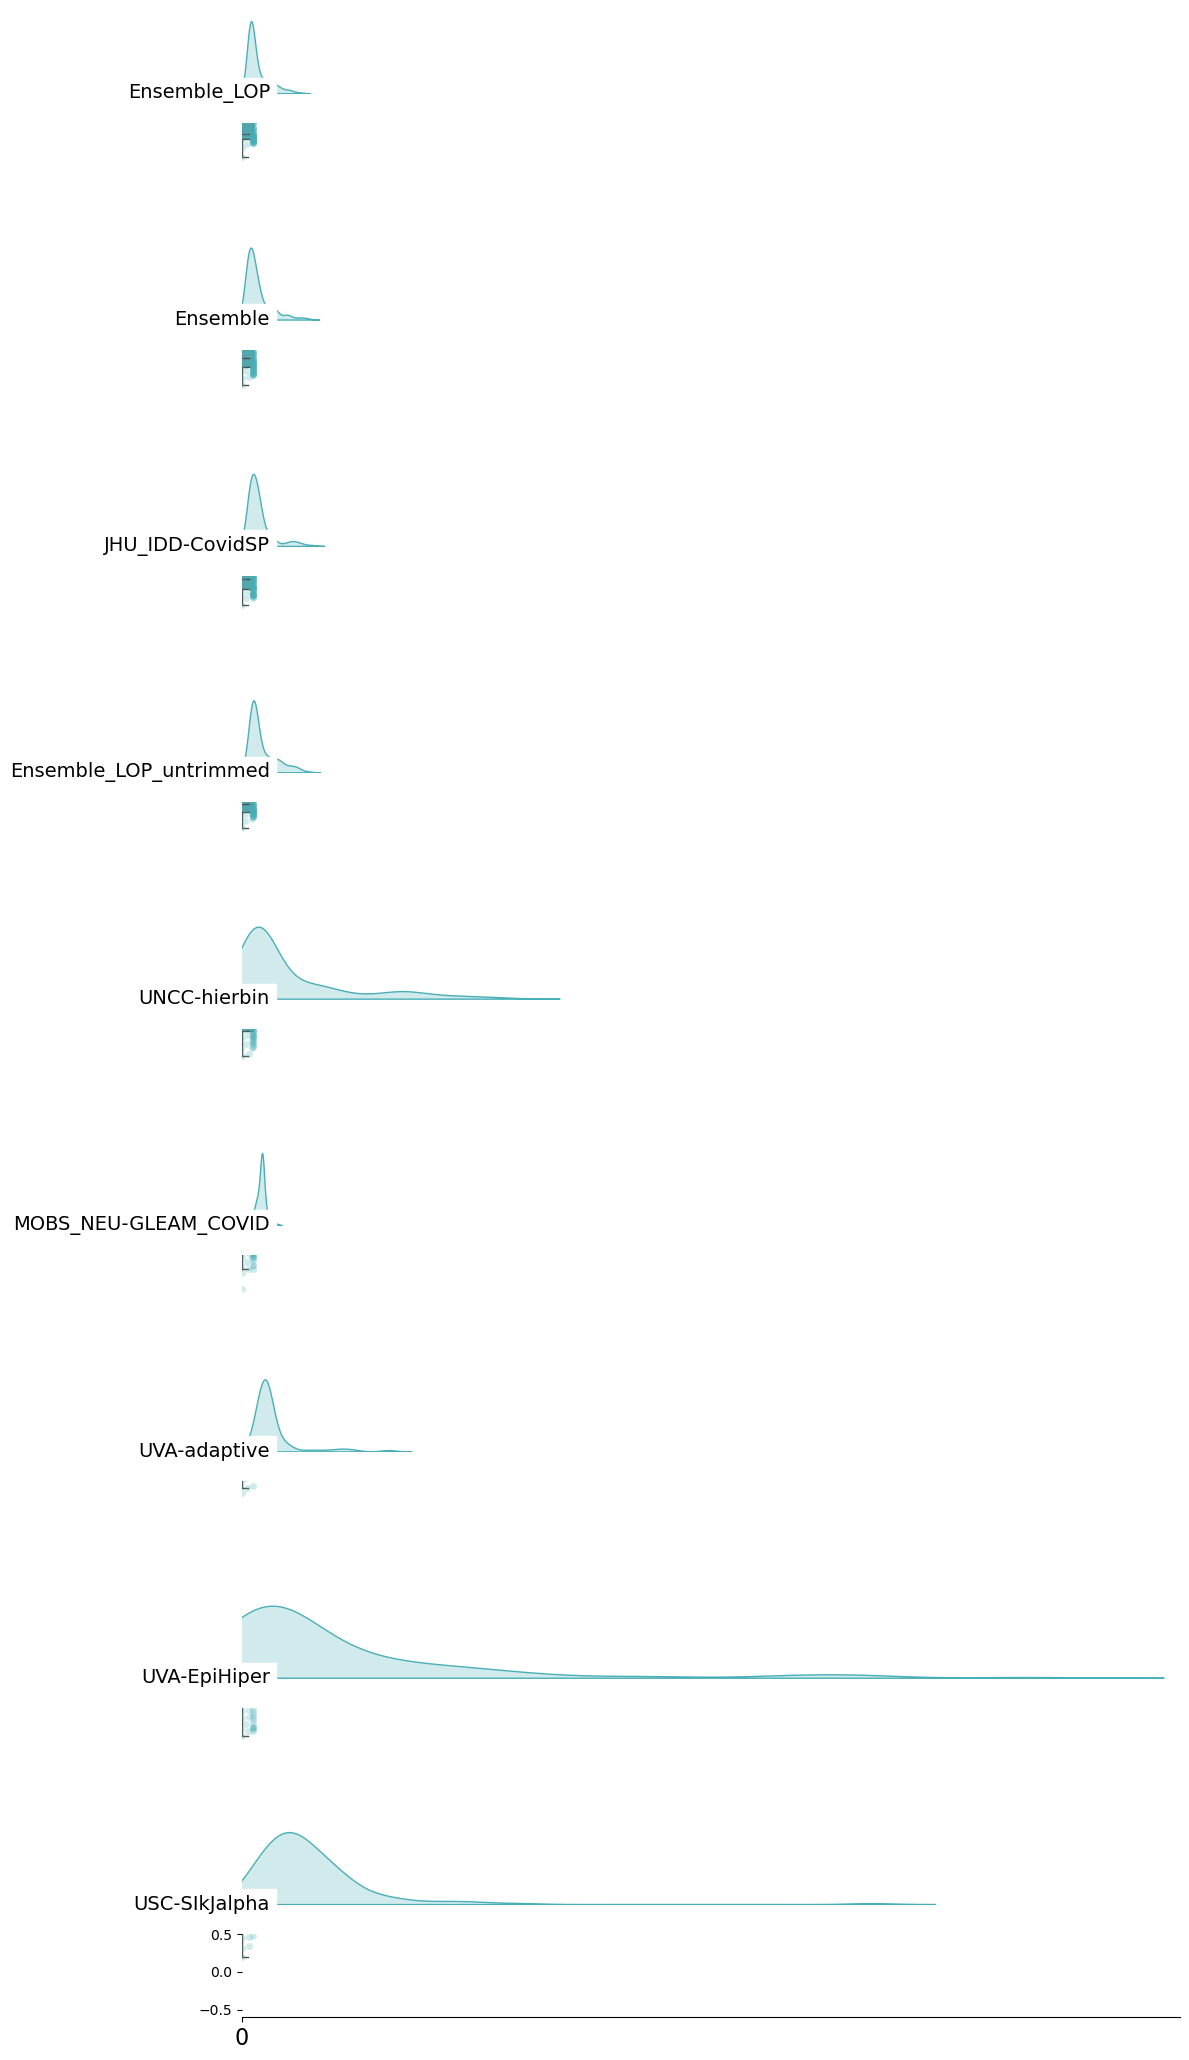

In [13]:
fig, ax_mat = create_penguin_plots(wisnormalldf[wisnormalldf['values'] >= 0],kde_args = {"lw":1,"bw_adjust":.9})
